23.407709770274106
23.40810659855441
4.838151482774605
4.83819249292072


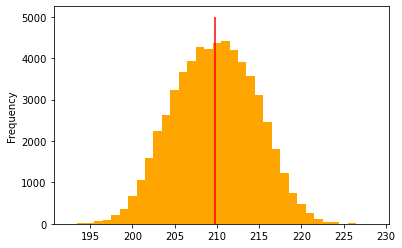

,193,194,195,196,197,198,199,200,201,202,...,218,219,220,221,222,223,224,226,227,229
lidar,4.000000,10.00000,13.00000,59.000,84.000000,205.000000,353.000000,668.000000,1053.000000,1584.000000,...,1224.00000,749.000000,486.000000,252.000000,127.000000,55.000000,32.000000,15.000000,3.000000,1.000000
probes,0.000068,0.00017,0.00022,0.001,0.001424,0.003475,0.005984,0.011324,0.017851,0.026853,...,0.02075,0.012697,0.008239,0.004272,0.002153,0.000932,0.000542,0.000254,0.000051,0.000017


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

#データをPandasのデータフレームに代入している。
data = pd.read_csv("sensor_data_200.txt",delimiter=" ",header=None,names=("data","time","ir","lidar"))

#平均値
mean = data["lidar"].mean()

#標本分散、不偏分散、両方の標準偏差
zs = data["lidar"]
diff_square = [(z - mean)**2 for z in zs]  #リスト内包表記
sampling_var = sum(diff_square)/len(zs)
unbiased_var = sum(diff_square)/(len(zs)-1)
sampling_stddev = math.sqrt(sampling_var)
unbiased_stddev = math.sqrt(unbiased_var)

#ヒストグラム作成
bins_value = max(data["lidar"])-min(data["lidar"])
data["lidar"].plot(bins = bins_value, kind="hist", align="left", color="orange")
plt.vlines(mean, ymin=0, ymax=5000, color="red")
plt.show()

#頻度
freqs = pd.DataFrame(data["lidar"].value_counts()).sort_index()
freqs["probes"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose()

In [ ]:
#確率質量関数
#fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,6))
#freqs["probes"].sort_index(axis=0,level="lidar").plot(ax=axes[0,0], kind="line")
freqs["probes"].plot(kind="bar", color="Black")
plt.show()

In [105]:
data = np.arange(25).reshape(5,5)
df = pd.DataFrame(data,index=[0,2,3,5,9],columns=[12,43,33,22,15])
print(df.index)
print(df.columns)
print(freqs.index)
print(freqs.columns)

Int64Index([0, 2, 3, 5, 9], dtype='int64')
Int64Index([12, 43, 33, 22, 15], dtype='int64')
Int64Index([211, 210, 208, 209, 212, 207, 213, 206, 214, 205, 215, 204, 216,
            203, 217, 202, 218, 201, 219, 200, 220, 199, 221, 198, 222, 197,
            196, 223, 224, 226, 195, 194, 193, 227, 229],
           dtype='int64')
Index(['lidar', 'probes'], dtype='object')
